In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.datasets import load_breast_cancer

In [140]:
class LogisticRegression:

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def compute_gradients(self, X_train, Y_train, Y_cap):
        dw = np.dot(X_train.T, (Y_cap - Y_train)) / Y_train.shape[0]
        db = np.sum((Y_cap - Y_train)) / Y_train.shape[0]
        return  dw, db

    def train(self, X, Y, n_iter, alpha):
        W = np.zeros(X.shape[1])
        b = 0
        for i in range(n_iter):
            y_cap = self.sigmoid(np.dot(X, W) + b)
            dw, db = self.compute_gradients(X, Y, y_cap)
            W = W - alpha * dw
            b = b - alpha * db
        self.W = W
        self.b = b
        return

    def predict(self, X):
        y_cap = self.sigmoid(np.dot(X, self.W) + self.b)
        y_pred = [1 if i > 0.5 else 0 for i in y_cap]
        return np.array(y_pred)
    
    def evaluate(self, X, Y):
        y_pred = self.predict(X)
        acc = len(np.where(y_pred == Y)[0]) / len(Y)
        return acc

In [141]:
def decision_boundary(model, X, Y):
    X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    XX, YY = np.meshgrid(np.arange(X1_min, X1_max, 0.02), np.arange(X2_min, X2_max, 0.02))

    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.scatter(X[np.where(Y==0)[0], 0], X[np.where(Y==0)[0], 1], label='0')
    plt.scatter(X[np.where(Y==1)[0], 0], X[np.where(Y==1)[0], 1], label='1')
    plt.contour(XX, YY, Z, cmap=plt.cm.Paired)
    plt.legend()
    plt.show()

In [142]:
# Q. 3.2 
X = np.vstack((np.random.multivariate_normal([2.5, 0.0], np.identity(2), 750), np.random.multivariate_normal([-2.5, 0.0], np.identity(2), 750)))
Y = np.concatenate((np.zeros(750), np.ones(750)))

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=250, random_state=1)

In [144]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=250, random_state=1)

In [145]:
lr = LogisticRegression()
lr.train(X_train, Y_train, n_iter=1000, alpha=0.1)

In [146]:
# Logistic Regression
# alpha (learning rate = 0.1), epochs = 1000
# Test Accuracy = 99.2%
lr.evaluate(X_test, Y_test)

0.992

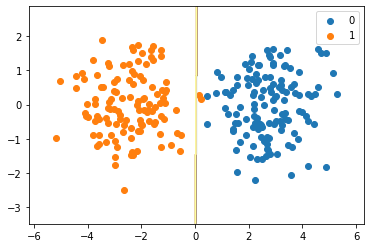

In [147]:
decision_boundary(lr, X_test, Y_test)

In [162]:
# Q. 3.3

In [163]:
X, Y = make_circles(1500)

In [164]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=250, random_state=1)

In [165]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=250, random_state=1)

In [166]:
lr = LogisticRegression()
lr.train(X_train, Y_train, n_iter=1000, alpha=0.1)

In [167]:
lr.evaluate(X_train, Y_train)

0.549

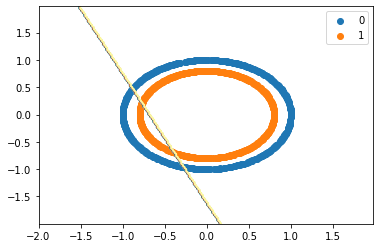

In [168]:
decision_boundary(lr, X_train, Y_train)

In [169]:
# Q. 3.4

In [170]:
X, Y = load_breast_cancer(return_X_y=True)

In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=95, random_state=1)

In [172]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=95, random_state=1)

In [183]:
lr = LogisticRegression()
lr.train(X_train, Y_train, n_iter=1000, alpha=0.01)

/var/folders/v0/g401c4x979d___jdl5ddw2_r0000gn/T/ipykernel_3978/1224336609.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


In [184]:
# Logistic Regression - Linear
# epochs=1000, alpha (lr) = 0.01
# Accuracy = 93.68%
lr.evaluate(X_test, Y_test)

/var/folders/v0/g401c4x979d___jdl5ddw2_r0000gn/T/ipykernel_3978/1224336609.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


0.9368421052631579